# Diagramas de Cortante e Momento em Vigas

Exemplo disponível em https://youtu.be/MNW1-rB46Ig

<img src="viga1.jpg">

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
q = 10
L = 1
N=10

# Reações de Apoio
VA=3*q*L/4
VB=q*L/4
print("Reação de Apoio em A (kN) =",VA)
print("Reação de Apoio em B (kN) =",VB)

Reação de Apoio em A (kN) = 7.5
Reação de Apoio em B (kN) = 2.5


Cálculo da Cortante pela integração do carregamento usando a Regra do Trapézio

In [3]:
def Cortante(q,x,V0):
    # Entro com o carregamento, comprimento do trecho e cortante em x[0]
    V = np.zeros(len(x)) # inicializa
    dx=x[1]    # passo
    V[0]=V0   # Valor inicial da cortante
    for i in range(1,N):
        V[i]=V[i-1]+dx*(q[i-1]+q[i])/2
    return np.array(V)

Cálculo do Momento Fletor pela integração do carregamento usando a Regra do Trapézio

In [4]:
def Momento(V,x,M0):
    # Entro com o momento, comprimento do trecho e momento em x[0]
    M = np.zeros(len(x)) # inicializa
    dx=x[1]    # passo
    M[0]=M0   # Valor inicial da cortante
    for i in range(1,N):
        M[i]=M0+M[i-1]+dx*(V[i-1]+V[i])/2
    return np.array(M)

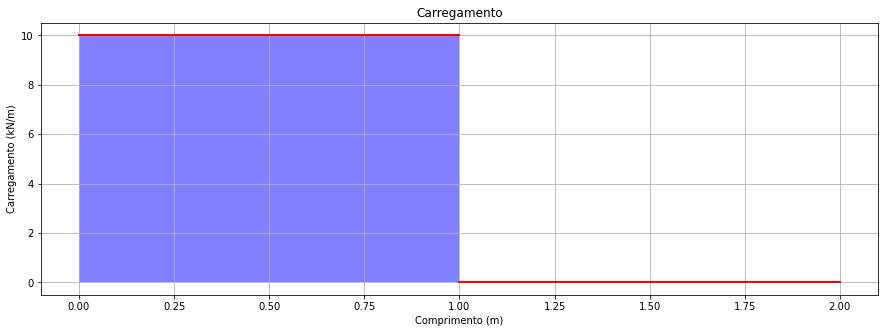

In [5]:
carregamento1 = q*np.ones(N)
carregamento2 =0*np.ones(N)
x1=np.linspace(0,L,N)
x2=np.linspace(L,2*L,N)

# Carregamento
plt.figure(figsize=(15,5))
plt.plot(x1,carregamento1,color='r',linewidth=2)
plt.fill_between(x1,carregamento1, facecolor='b', alpha=0.5)
plt.plot(x2,carregamento2,color='r',linewidth=2)
plt.fill_between(x2,carregamento2, facecolor='b', alpha=0.5)
plt.xlabel("Comprimento (m)")
plt.ylabel("Carregamento (kN/m)")
plt.grid(which='major', axis='both')
plt.title("Carregamento")
plt.show()

In [6]:
# Trecho I - 0<x<L
V1=-q*x1+VA                      # Cortante Teórica
M1=VA*x1-q*(x1*x1)/2             # Momento Teórico
# por integração numérica
V1int = Cortante(-carregamento1,x1,VA)
M1int = Momento(V1int,x1,0)

# Trecho II - L<x<2L
V2=VA-q*np.ones(N)*L        # Cortante Teórico
M2=VA*x2-q*L*(x2-L/2)       # Momento Teórico
# por integração numérica
V2int=Cortante(-carregamento2,x2,V1int[N-1])
M2int=Momento(V2int,x2,M1int[N-1])

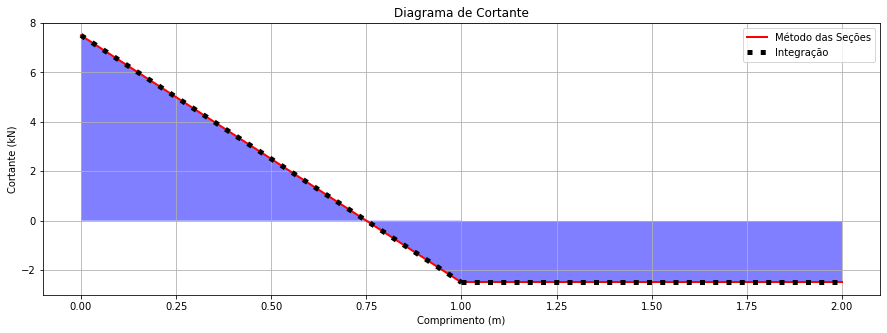

In [7]:
# Cortante
plt.figure(figsize=(15,5))
plt.plot(x1,V1,color='r',linewidth=2)
plt.fill_between(x1, V1, facecolor='b', alpha=0.5)
plt.plot(x2,V2,color='r',linewidth=2,label="Método das Seções")
plt.fill_between(x2, V2, facecolor='b', alpha=0.5)
plt.plot(x1,V1int,color='k',linestyle = 'dotted', linewidth=5,label="Integração")
plt.plot(x2,V2int,color='k',linestyle = 'dotted', linewidth=5)
plt.legend(loc ="upper right")
plt.xlabel("Comprimento (m)")
plt.ylabel("Cortante (kN)")
plt.grid(which='major', axis='both')
plt.title("Diagrama de Cortante")
plt.show()

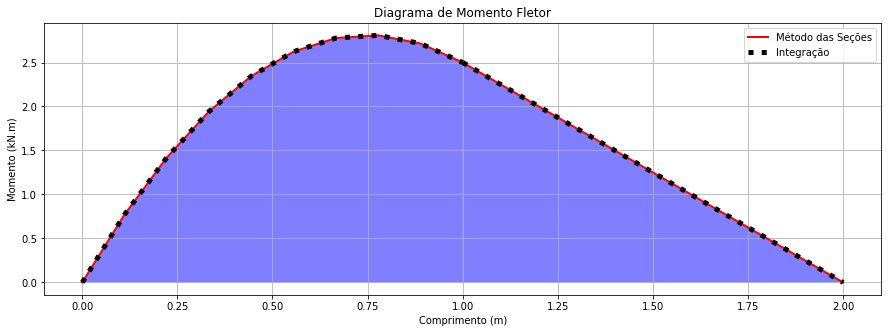

In [8]:
# Momento Fletor
plt.figure(figsize=(15,5))
plt.plot(x1,M1,color='r',linewidth=2)
plt.fill_between(x1, M1, facecolor='b', alpha=0.5)
plt.plot(x2,M2,color='r',linewidth=2,label="Método das Seções")
plt.fill_between(x2, M2, facecolor='b', alpha=0.5)
plt.plot(x1,M1int,color='k',linestyle = 'dotted', linewidth=5,label="Integração")
plt.plot(x2,M2int,color='k',linestyle = 'dotted', linewidth=5)
plt.legend(loc ="upper right")
plt.xlabel("Comprimento (m)")
plt.ylabel("Momento (kN.m)")
plt.grid(which='major', axis='both')
plt.title("Diagrama de Momento Fletor")
plt.show()